# HW6: Neural Network (Due May 22)


#### Please restart the kernel and run all before you submit. 


#### Name:  Amay Jain


There are several goals of this HW:

1. You can implement fully connected neural network (FNN) and convolutional neural network (CNN) using Python.

2. We want to verify that CNN works better than FNN in image classification task.

3. We want to analyze how the neural network structure and batch_size affect the test accuracy. 

Remark: There are many factors affecting the test performance. Due to the computation limitation, I cannot analyze all of them. 

**You are allowed to use either Tensorflow or PyTorch. If you fail to install modules, feel free to use Google Colab.**

**Important remark: Your grader will not run your code this time since it is time consuming. Please restart the kernel and run all before you submit, and make sure that your plot is visible on Gradescope.**

## Import all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

2024-05-21 09:50:11.655120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load CIFAR10 Data

Load training and test samples from cifar10 dataset. Then normalize pixel values to be between 0 and 1 by dividing 255.0.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() 

train_images, test_images = train_images / 255, test_images / 255

## Data preparation for fully connected neural networks

Before we use convolutional neural network for image classification task, people used fully connected neural networks. In this section, we will prepare the data for FNN.

To implement FNN, we require a dataset which is a 2D numpy array where each row represents each sample and each column is a features. For image dataset, we will have 3D numpy array (grey images) or 4D numpy array (color images). Our goal is to reshaping 3D/4D numpy array to 2D numpy array such that each row is one image and columns are pixel values.

Simplification: For grey images, you can assume the shape is (m,d1,d2) where m is the number of images, d1 and d2 are the numbers of pixels on each side. For color images, you can assume the shape is (m,d1,d2,r) where m, d1, d2 have the same meaning as before and r is the number of color channels (usually r=3 or 4).

Please write a function to do this step. Your function should work for all image datasets (both grey and color images). Detailed docstring is required to explain your function. You must include the shape of your inputs and outputs when you write the docstring.

Some test codes are given to verify your codes.

**Later, you will use the function you write to generate inputs that is used to train your FNN models.**

In [3]:
def image_reshape(x):

    '''
    Reshapes a 3d/4d array of images into a 2d array

    Args:
        x (numpy array): 3d/4d array of images

    Returns:
        Reshaped 2d array of images
    '''

    # find number of images (1st dimension of 2d array)
    num_of_images = x.shape[0]

    # second dimension of 2d array (product of all remaining dimensions)
    resize = np.prod(x.shape[1:])

    # return 2d array
    return x.reshape(num_of_images, resize)

In [4]:
# test example 1:
X1 = np.arange(24).reshape(3,2,4)

# Passing X1 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7],
#        [ 8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23]])

image_reshape(X1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23]])

In [5]:
# test example 2:
X2 = np.arange(48).reshape(3,2,4,2)

# Passing X2 to your function will return 
# array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
#        [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
#        [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

image_reshape(X2)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [6]:
# test example 3:
X_train = image_reshape(train_images)
idx = 1
np.allclose(X_train[1], train_images[1].flatten())

# let me explain this example further,
# train_images is the training images obtained from loading CIFAR10 data
# passing train_images to the function gives X_train.
#
#
# Notice that X_train and train_images are variables I defined, you may have different names.
# image_reshape is my function, you may also have different function name
# 
# Once you adjust variable names and function names, there is no error raised
# the output of this test example is True

True

In [7]:
# reshape images for FNN
train_images_fnn, test_images_fnn = image_reshape(train_images), image_reshape(test_images)

## Construct your FNN model

In this section, you will construct a fully connected neural network. You only need to create the model by calling `tensorflow.models.Sequential` (other methods are also acceptable), and you do not need to train the model.

**Model:** This Neural network contains three hidden layers with number of neurons 50, 50, 50, respectively. The activation function is ReLU and you should use "he_normal" initialization for all hidden layers. 

You should determine the number of neurons in the input layer and output layer and report the total number of parameters.

In [8]:
# num of features
features = 3072 

# num of categories
categories = 10 




# FNN for batchsize 16
fnn_16 = models.Sequential(
    
    [

        # first hidden layer
        layers.Dense(50, input_shape = (features, ), activation = "relu", kernel_initializer = "he_normal"), 
    
        # second hidden layer
        layers.Dense(50, activation = "relu", kernel_initializer = "he_normal"), 

        # third hidden layer
        layers.Dense(50, activation = "relu", kernel_initializer = "he_normal"), 
    
        # output
        layers.Dense(categories) # 10 different categories 
    
    ]
)




# FNN for batchsize 64
fnn_64 = models.Sequential(
    
    [

        # first hidden layer
        layers.Dense(50, input_shape = (features, ), activation = "relu", kernel_initializer = "he_normal"), 
    
        # second hidden layer
        layers.Dense(50, activation = "relu", kernel_initializer = "he_normal"), 

        # third hidden layer
        layers.Dense(50, activation = "relu", kernel_initializer = "he_normal"), 
    
        # output
        layers.Dense(categories) # 10 different categories 
    
    ]
)

2024-05-21 09:50:44.860824: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Construct your CNN models

In this section, you will construct two convolutional neural networks. You do not need to train the models. Just define them using `tensorflow.models.Sequential`.

I do not have any instructions on the construction of your models. You should define two models and your models should be different. Feel free to change the neural network structure, kernel size, number of neurons, and etc. Please do not use very complicated model, you will reach computation limitation. Your model should be different from the model in my lecture notes.

**Suggestion**: It is better to think about a question first, and then determine model structure. For example, suppose you want to understand how the number of convolution layers affects the test accuracy, then you can define two models which contain different numbers of convolution layers. To make the comparison fair, you should make other factors the same. Try to think about the question you are interested in and design the models.


In [9]:
# CNN model 1 for batchsize 16
cnn1_16 = models.Sequential(
    
    [

        # 64 kernels, 3 by 3 kernel
        layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
        
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),
        
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),

        # flatten into 1d array
        layers.Flatten(),

        # Neural network
        layers.Dense(64, activation = 'relu'),

        layers.Dense(32, activation = 'relu'),

        # 10 different categories
        layers.Dense(10) 
        
    ]
)



# CNN model 1 for batchsize 64
cnn1_64 = models.Sequential(
    
    [

        # 64 kernels, 3 by 3 kernel
        layers.Conv2D(64, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
        
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),
        
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),

        # flatten into 1d array
        layers.Flatten(),

        # Neural network
        layers.Dense(64, activation = 'relu'),

        layers.Dense(32, activation = 'relu'),

        # 10 different categories
        layers.Dense(10) 
        
    ]
)










# CNN model 2 for batchsize 16
cnn2_16 = models.Sequential(
    
    [

        # 32 kernels, 3 by 3 kernel
        layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
        
        layers.AveragePooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),
        
        layers.AveragePooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),

        # flatten into 1d array
        layers.Flatten(),

        # Neural network
        layers.Dense(64, activation = 'relu'),

        layers.Dense(128, activation = 'relu'),

        layers.Dense(64, activation = 'relu'),

        # 10 different categories
        layers.Dense(10) 
        
    ]
)




# CNN model 2 for batchsize 64
cnn2_64 = models.Sequential(
    
    [

        # 32 kernels, 3 by 3 kernel
        layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
        
        layers.AveragePooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),
        
        layers.AveragePooling2D((2, 2)),
        
        layers.Conv2D(64, (3, 3), activation = 'relu'),

        # flatten into 1d array
        layers.Flatten(),

        # Neural network
        layers.Dense(64, activation = 'relu'),

        layers.Dense(128, activation = 'relu'),

        layers.Dense(64, activation = 'relu'),

        # 10 different categories
        layers.Dense(10) 
        
    ]
)

## Train your model

In this part, you should write a function to train your models. Your function should take the model, training samples, test samples, and batch_size as inputs and returns test accuracy after each epoch. Detailed function docstring is required. Your function should not include any global variables.

Comments:
1. Since this is a classification problem, you can use the same loss function and metric for all different models. You should determine the loss function and metric.

2. Please use epochs=5, otherwise it takes long to train your models.


In [10]:
def run_model(model, train_samples, test_samples, batch_size = 16):

    '''
    Runs a neural network model by training data with a specific batch size and then testing data after each epoch for 5 epochs

    Args:
        model (tensorflow neural network model): classification neural network model
        train_samples (tuple): tuple of training data and training labels
        test_samples (tuple): tuple of training data and training labels
        batch_size (int): number of training samples to use per training iteration

    Returns:
        Trained model and test accuracy after each epoch
    '''

    # separate images and labels
    (train_images, train_labels) = train_samples
    (test_images, test_labels) = test_samples

    # loss function
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

    # compile model
    compile = model.compile(optimizer = "adam", loss = loss_fn, metrics = ["accuracy"])

    # fit model
    fit = model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs = 5, batch_size = batch_size)

    # run model
    return fit

## Numerical experiments:

Now we can do our numerical experiments. Remember that we have three models (1 FNN, 2 CNNs), You should try different batch sizes and optimizers for each model, see below:

- Batch_size = 16 or 64.

Now, we have 6 different combinations. Please visualize all test accuracies in 1 plot. See my sample plot below. 


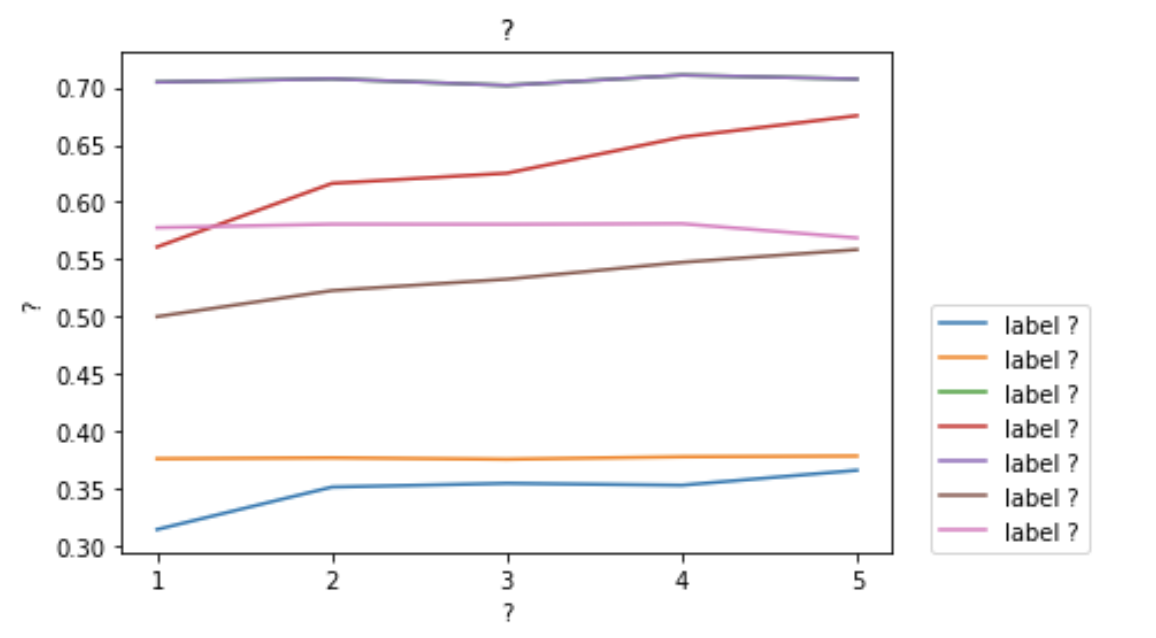

I do not have any legends, labels, title, and etc in my plot, you should include informative legends, labels, title, and etc. You can also add other features (e.g. markers) to create nice plot. You are welcome to use either matplotlib or seaborn to draw your plot.


**Important remark: It takes me 14 minutes to train 6 models. If your training time is longer than you expect, please try to use simple CNN models.** 



In [11]:
# FNN
print('FNN model\n')
print('Batch size = 16\n')
fnn_history_bs16 = run_model(fnn_16, (train_images_fnn, train_labels), (test_images_fnn, test_labels), 16)
print('\n')
print('Batch size = 64\n')
fnn_history_bs64 = run_model(fnn_64, (train_images_fnn, train_labels), (test_images_fnn, test_labels), 64)
print('\n\n\n')

# CNN 1
print('CNN model 1\n')
print('Batch size = 16\n')
cnn1_history_bs16 = run_model(cnn1_16, (train_images, train_labels), (test_images, test_labels), 16)
# tf.keras.backend.clear_session()
print('\n')
print('Batch size = 64\n')
cnn1_history_bs64 = run_model(cnn1_64, (train_images, train_labels), (test_images, test_labels), 64)
print('\n\n\n')

# CNN 2
print('CNN model 2\n')
print('Batch size = 16\n')
cnn2_history_bs16 = run_model(cnn2_16, (train_images, train_labels), (test_images, test_labels), 16)
print('\n')
print('Batch size = 64\n')
cnn2_history_bs64 = run_model(cnn2_64, (train_images, train_labels), (test_images, test_labels), 64)
print('\n\n\n')

FNN model

Batch size = 16

Epoch 1/5
3125/3125 [==============================] - 9s 2ms/step - loss: 1.9384 - accuracy: 0.2777 - val_loss: 1.8688 - val_accuracy: 0.3083
Epoch 2/5
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8507 - accuracy: 0.3217 - val_loss: 1.8273 - val_accuracy: 0.3285
Epoch 3/5
3125/3125 [==============================] - 7s 2ms/step - loss: 1.8187 - accuracy: 0.3374 - val_loss: 1.8079 - val_accuracy: 0.3320
Epoch 4/5
3125/3125 [==============================] - 5s 2ms/step - loss: 1.8021 - accuracy: 0.3435 - val_loss: 1.7803 - val_accuracy: 0.3401
Epoch 5/5
3125/3125 [==============================] - 5s 2ms/step - loss: 1.7927 - accuracy: 0.3468 - val_loss: 1.7947 - val_accuracy: 0.3373


Batch size = 64

Epoch 1/5
782/782 [==============================] - 5s 5ms/step - loss: 1.9091 - accuracy: 0.3050 - val_loss: 1.7559 - val_accuracy: 0.3625
Epoch 2/5
782/782 [==============================] - 2s 2ms/step - loss: 1.7524 - accuracy: 0.367

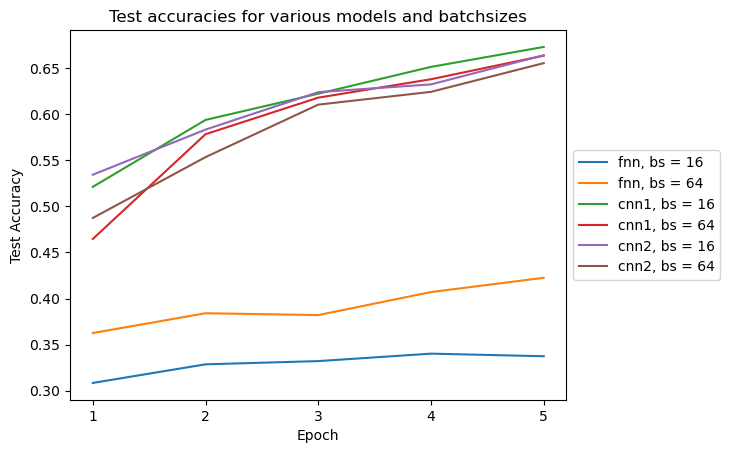

In [12]:
# Graph test accuracies for models above using history attribute
epochs = range(1, 6)
plt.plot(epochs, fnn_history_bs16.history['val_accuracy'], label = 'fnn, bs = 16')
plt.plot(epochs, fnn_history_bs64.history['val_accuracy'], label = 'fnn, bs = 64')
plt.plot(epochs, cnn1_history_bs16.history['val_accuracy'], label = 'cnn1, bs = 16')
plt.plot(epochs, cnn1_history_bs64.history['val_accuracy'], label = 'cnn1, bs = 64')
plt.plot(epochs, cnn2_history_bs16.history['val_accuracy'], label = 'cnn2, bs = 16')
plt.plot(epochs, cnn2_history_bs64.history['val_accuracy'], label = 'cnn2, bs = 64')
plt.title('Test accuracies for various models and batchsizes')
plt.xticks(epochs)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

## Repeate your experiments:

Since there is randomness in your experiment such as the random initialization of your parameters (`he_normal`) and random shuffle of your dataset (`model.fit`), we usually repeat previous experiments many times and compute the mean to alleviate the randomness. We can also compute the standard deviation to measure the variation. We expect small standard deviation and it means that randomness in your experiment does not change your test accuracy too much.

You may notice that training CNN is time consuming. To save your time, we will do this part only for FNN. 

Please repeat your previous experiments 5 times for your FNN model. Specifically, you should repeat the following process 5 times: create your FNN model, select batch_size = 16/64, train your model and record test accuracy. 

Then, compute average test accuracy (1 decimal place) and standard deviation (1 decimal places) after each epoch and fill in the following table. 

In ths following table, 67.1% is the average test accuracy, 5.1% is the standard deviation. You should replace them using the data you compute. I only use those numbers to generate this template, and they do not have any real meaning.

|                      |   Epoch 1    |   Epoch 2    |   Epoch 3    |   Epoch 4    |   Epoch 5    |
|:--------------------:|:------------:|:------------:|:------------:|:------------:|:------------:|
|    batch_size = 16   |32.3%$\pm$3.7%|33.2%$\pm$3.5%|34.6%$\pm$4.3%|34.9%$\pm$5.5%|35.1%$\pm$4.5%|
|    batch_size = 64   |34.8%$\pm$1.8%|38.4%$\pm$1.1%|40.7%$\pm$1.2%|40.6%$\pm$1.6%|40.7%$\pm$2.6%|


In [13]:
# 1st 5 rows will store results from batchsize = 16 and next 5 rows will store results from batchsize = 64
epoch_accuracies = np.zeros(shape = (10, 5))

# loop through each model run with a specific batchsize
for i in range(10):

    if i < 5:
        batchsize = 16
    else:
        batchsize = 64

    print(batchsize, '\n')

    # initialize model for each iteration
    fnn = models.Sequential(
    
        [
    
            # first hidden layer
            layers.Dense(50, input_shape = (features, ), activation = "relu", kernel_initializer = "he_normal"), 
        
            # second hidden layer
            layers.Dense(50, activation = "relu", kernel_initializer = "he_normal"), 
    
            # third hidden layer
            layers.Dense(50, activation = "relu", kernel_initializer = "he_normal"), 
        
            # output
            layers.Dense(categories) # 10 different categories 
        
        ]
    )

    # train model
    fnn_history = run_model(fnn, (train_images_fnn, train_labels), (test_images_fnn, test_labels), batchsize)

    # store test accuracies
    epoch_accuracies[i] = fnn_history.history['val_accuracy']

    print('\n\n\n')

16 

Epoch 1/5
3125/3125 [==============================] - 7s 2ms/step - loss: 1.9392 - accuracy: 0.2908 - val_loss: 1.8262 - val_accuracy: 0.3340
Epoch 2/5
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8024 - accuracy: 0.3429 - val_loss: 1.8050 - val_accuracy: 0.3439
Epoch 3/5
3125/3125 [==============================] - 6s 2ms/step - loss: 1.7615 - accuracy: 0.3604 - val_loss: 1.7135 - val_accuracy: 0.3753
Epoch 4/5
3125/3125 [==============================] - 6s 2ms/step - loss: 1.7373 - accuracy: 0.3694 - val_loss: 1.7860 - val_accuracy: 0.3503
Epoch 5/5
3125/3125 [==============================] - 6s 2ms/step - loss: 1.7206 - accuracy: 0.3752 - val_loss: 1.7369 - val_accuracy: 0.3633




16 

Epoch 1/5
3125/3125 [==============================] - 6s 2ms/step - loss: 1.9444 - accuracy: 0.2836 - val_loss: 1.8520 - val_accuracy: 0.3156
Epoch 2/5
3125/3125 [==============================] - 4s 1ms/step - loss: 1.8172 - accuracy: 0.3377 - val_loss: 1.7762 - val_ac

In [14]:
epoch_accuracies_16 = epoch_accuracies[:5, :] # accuracies from batchsize = 16 run
epoch_accuracies_64 = epoch_accuracies[5:, :] # accuracies from batchsize = 64 run

In [15]:
for i in range(5):
    print(f'Epoch {i + 1}: The avg test accuracy is {round(epoch_accuracies_16[:, i].mean() * 100, 1)} and the std is {round(epoch_accuracies_16[:, i].std() * 100, 1)}')
    
print('\n\n\n')

for i in range(5):
    print(f'Epoch {i + 1}: The avg test accuracy is {round(epoch_accuracies_64[:, i].mean() * 100, 1)} and the std is {round(epoch_accuracies_64[:, i].std() * 100, 1)}')

Epoch 1: The avg test accuracy is 31.7 and the std is 3.4
Epoch 2: The avg test accuracy is 34.4 and the std is 4.3
Epoch 3: The avg test accuracy is 35.7 and the std is 5.0
Epoch 4: The avg test accuracy is 35.3 and the std is 4.6
Epoch 5: The avg test accuracy is 36.4 and the std is 4.7




Epoch 1: The avg test accuracy is 34.2 and the std is 1.6
Epoch 2: The avg test accuracy is 36.9 and the std is 2.2
Epoch 3: The avg test accuracy is 37.7 and the std is 2.3
Epoch 4: The avg test accuracy is 38.0 and the std is 3.4
Epoch 5: The avg test accuracy is 39.1 and the std is 3.3


## Conclusion:

Please list at least 3 informative conclusions based on your numerical results

1) When training the models with different batchsizes, I was under the impression that the larger batchsize would make the model perform better but it was actually the smaller batchsize that outperformed. While a larger batchsize does mean the model sees more data per iteration, a smaller batchsize means that the model has more iterations in total, so there is a tradeoff.

2) A larger batchsize results in lower variance among epochs when you re-run the model. When training a FNN model the test accuracies stagnated after each epoch compared to the CNN models where the test accuracies had a higher rate of increase after each epoch.

3) Surprisingly, my second CNN model which was a bit more complicated than my first CNN model (had one more hidden layer and more nuerons overall in each hidden layer) did not do as well as the first model. Perhaps for most cases a simpler model is better suited for most purposes although I did reduce the number of kernels as well as changed the pooling from max to average, which may have had a larger effect than anticipated.